# Spectral Analysis function Testing  

**Purpose**: Code for testing the spectral analysis functions on fake data

**Luke Colosi | lcolosi@ucsd.edu**

Force matplotlib plots to display directly within the output cell of the notebook: 

In [1]:
%matplotlib inline


Import python libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import correlate

# Set path to access python functions
sys.path.append('/Users/lukecolosi/Desktop/projects/graduate_research/Gille_lab/AirSeaCoupling/tools/')

#--- Luke's Python Functions ---# 
from spectra import spectrum2D_wavenumber_frequency

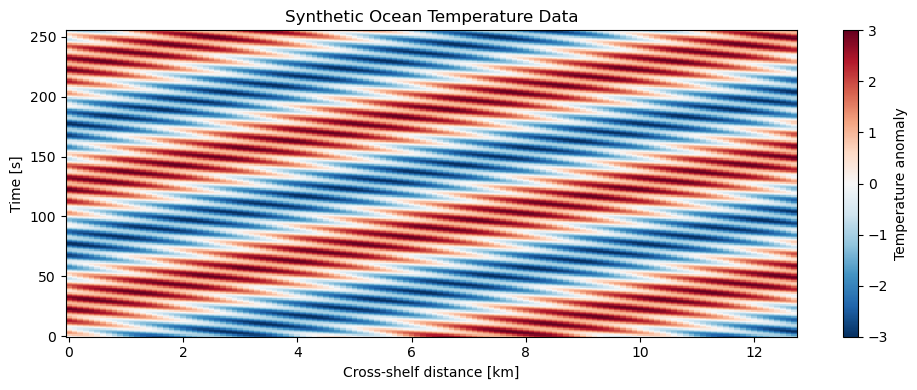

In [8]:
# Set parameters
Nt = 256              # number of time points
Nx = 128              # number of spatial points (cross-shelf)
dt = 1.0              # time spacing in seconds
dx = 100.0            # spatial spacing in meters
Mt = 4                # number of time segments
Mx = 2                # number of space segments

# Create time and space arrays
t = np.arange(Nt) * dt                  # time vector [s]
x = np.arange(Nx) * dx                  # cross-shelf distance vector [m]

# Create 2D meshgrid
T, X = np.meshgrid(t, x, indexing='ij')

# Define two sinusoidal signals in space and time
# Signal 1: low frequency, long wavelength
f1 = 0.01            # Hz (temporal frequency)
k1 = 2 * np.pi / 10000  # rad/m (spatial wavenumber)

# Signal 2: higher frequency and wavenumber
f2 = 0.1            # Hz
k2 = 2 * np.pi / 2000

# Construct data field as sum of two sinusoids
data = (2.0 * np.sin(2 * np.pi * f1 * T - k1 * X) +
        1.0 * np.sin(2 * np.pi * f2 * T + k2 * X))

# Plot the synthetic data for visualization
plt.figure(figsize=(10, 4))
plt.pcolormesh(x / 1000, t, data, shading='auto', cmap='RdBu_r')
plt.xlabel('Cross-shelf distance [km]')
plt.ylabel('Time [s]')
plt.title('Synthetic Ocean Temperature Data')
plt.colorbar(label='Temperature anomaly')
plt.tight_layout()
plt.show()


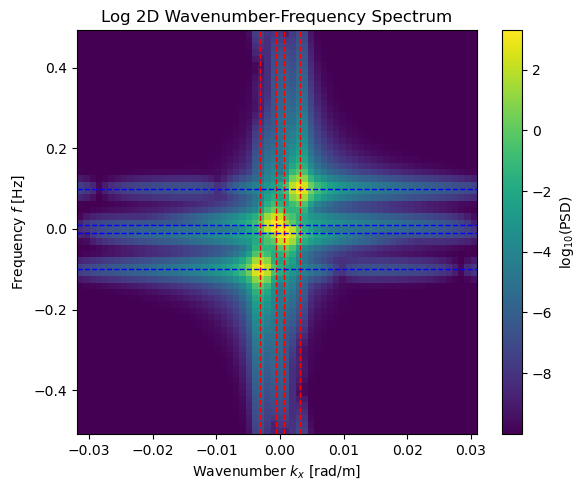

In [9]:
# Run your spectral analysis
m_spec, kx, f = spectrum2D_wavenumber_frequency(data, t, x, dt, dx, Mt, Mx)

# Plot result
plt.figure(figsize=(6, 5))
plt.pcolormesh(kx, f, np.log10(m_spec + 1e-10), shading='auto', cmap='viridis')
plt.xlabel('Wavenumber $k_x$ [rad/m]')
plt.ylabel('Frequency $f$ [Hz]')
plt.title('Log 2D Wavenumber-Frequency Spectrum')
plt.colorbar(label='log$_{10}$(PSD)')

# Add vertical lines at ±k1 and ±k2 (wavenumber space)
for k_val in [k1, -k1, k2, -k2]:
    plt.axvline(k_val, color='r', linestyle='--', linewidth=1)

# Add horizontal lines at ±f1 and ±f2 (frequency space)
for f_val in [f1, -f1, f2, -f2]:
    plt.axhline(f_val, color='b', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()
